# Data Preparation and Exploration 

### Prepare data

In [1]:
# Import relevant libraries 
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Draw graph on notebook
%matplotlib inline

# Use ggplot style 
plt.style.use('ggplot')

# Suspress Deprecation and Incorrect Usage Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from Google sheets using the URL and manipulating the URL to get the CSV file
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1JWzBy8775LyIk3-_VwqU9FUeF4sGDs6eyNSP4YEmVt4/edit#gid=911693755'
url = google_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(url)

In [3]:
# Number of row and columns in dataset
df.shape

(8760, 14)

In [4]:
# Print column names
print('Initial columns')
print(df.columns)

Initial columns
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(蚓)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [5]:
# Change column names more simple 
df.rename(columns={'Rented Bike Count':'Count', 'Temperature(蚓)':'Temp',
                   'Humidity(%)':'Humidity', 'Wind speed (m/s)':'Windspeed',
                   'Visibility (10m)':'Visibility', 'Dew point temperature(蚓)':'DP_Temp',
                   'Solar Radiation (MJ/m2)':'Solar_Rad', 'Rainfall(mm)':'Rainfall',
                   'Snowfall (cm)':'Snowfall', 'Functioning Day':'Func_Day'}, inplace=True)

In [6]:
# Check for missing values 
print(df.isna().any())

Date          False
Count         False
Hour          False
Temp          False
Humidity      False
Windspeed     False
Visibility    False
DP_Temp       False
Solar_Rad     False
Rainfall      False
Snowfall      False
Seasons       False
Holiday       False
Func_Day      False
dtype: bool


In [7]:
# Date column has to be changed to a date type data
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [8]:
# Create year, month, day, day of week columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayofWeek'] = df['Date'].dt.day_name()

In [9]:
# Create a column with year and month 
def combine_year_month(date):
    return "{0}-{1}".format(date.year, date.month)

df["Year_Month"] = df["Date"].apply(combine_year_month)

In [10]:
# Add column for Day and Night
df['Day_Night'] = df['Hour'].apply(lambda x :'Night' if (x>18 or x<6) else('Day'))

In [11]:
# Check the Data and see if changes were applied
df.head()

,Date,Count,Hour,Temp,Humidity,Windspeed,Visibility,DP_Temp,Solar_Rad,Rainfall,Snowfall,Seasons,Holiday,Func_Day,Year,Month,Day,DayofWeek,Year_Month,Day_Night
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,2017-12,Night
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,2017-12,Night
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,2017-12,Night
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,2017-12,Night
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday,2017-12,Night


### Explore the Data

In [12]:
# Checking the number of data from 2017 and 2018 
NUM_2017 = (df.Year == 2017).sum()
NUM_2018 = (df.Year == 2018).sum()
print('Number of data from 2017: {}, Number of data from 2018 : {}'.format(NUM_2017, NUM_2018))

Number of data from 2017: 744, Number of data from 2018 : 8016


<AxesSubplot:xlabel='Month', ylabel='Count'>

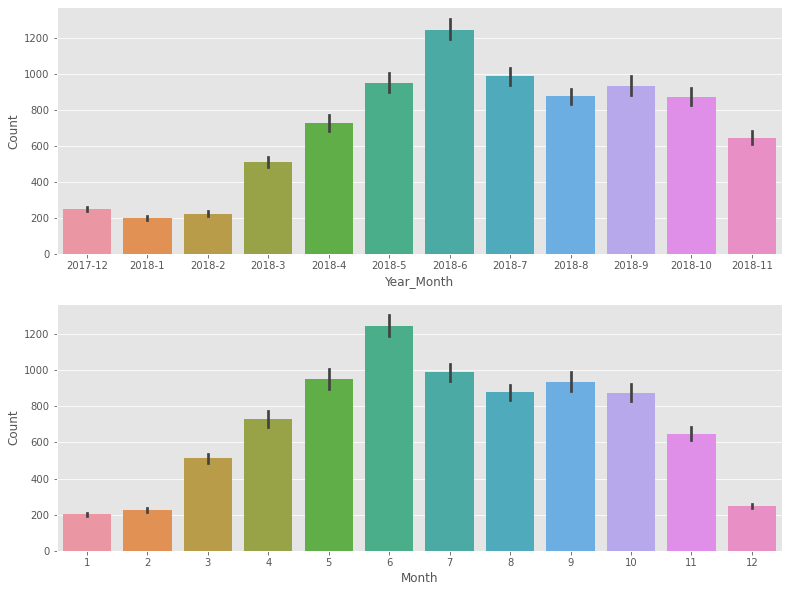

In [13]:
# Bar chart year and month for the number of bike rented
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(13, 10)
sns.barplot(data=df, x="Year_Month", y="Count", ax=ax1)
sns.barplot(data=df, x="Month", y="Count", ax=ax2)

<AxesSubplot:xlabel='Month', ylabel='Count'>

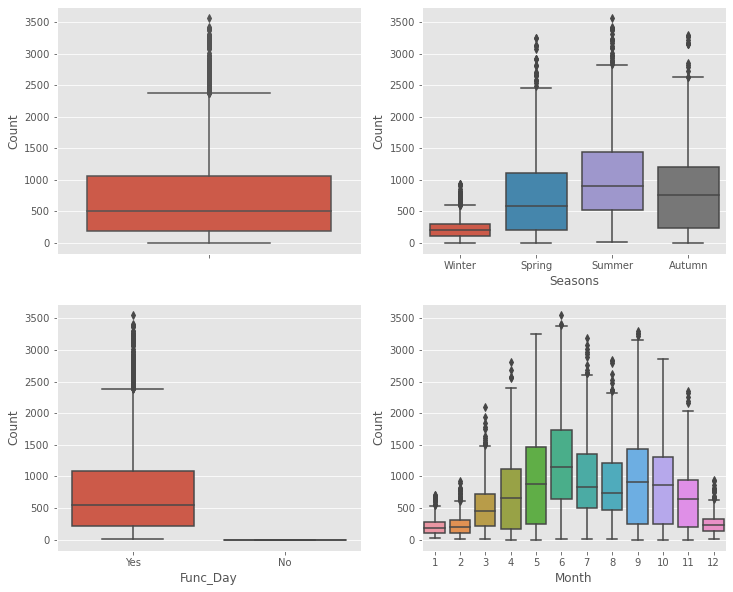

In [14]:
# Box plot to explore the data with the number of bicycle
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=df, y='Count', orient='v', ax=axes[0][0])
sns.boxplot(data=df, y="Count", x="Seasons", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="Count", x="Func_Day", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="Count", x="Month", orient="v", ax=axes[1][1])

<AxesSubplot:xlabel='Hour', ylabel='Count'>

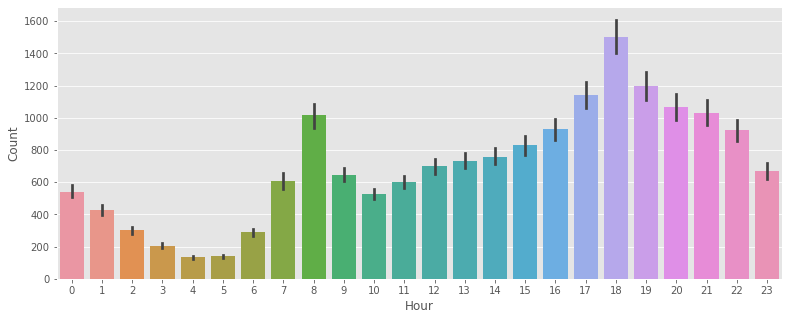

In [15]:
# Bar graph of number of bikes rent for each hour
plt.figure(figsize=(13,5))
sns.barplot(data=df, x='Hour', y='Count')

<AxesSubplot:xlabel='Hour', ylabel='Count'>

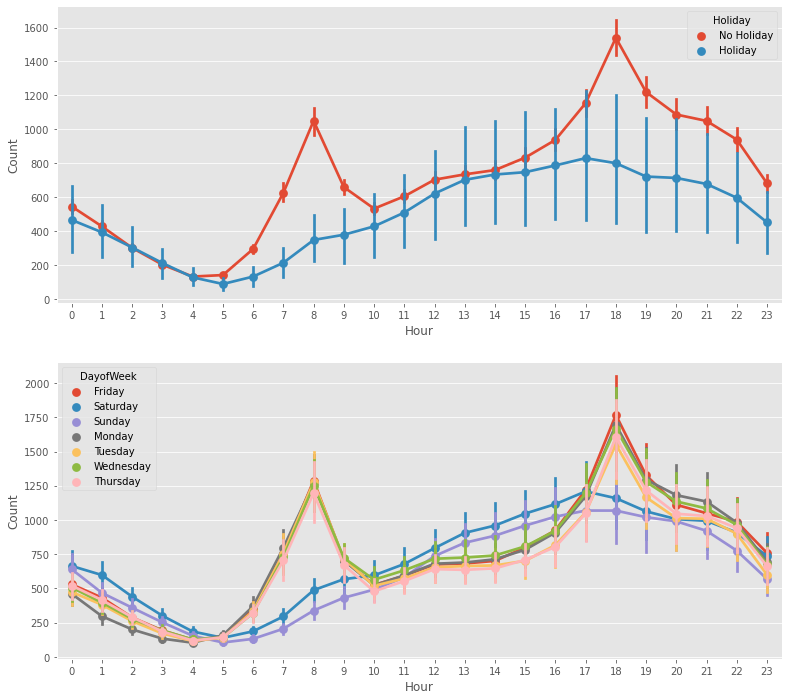

In [16]:
# Pointplot of Count VS. Bike with other features
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(13,12)
sns.pointplot(data=df, x='Hour', y='Count', hue='Holiday', ax=ax1)
sns.pointplot(data=df, x='Hour', y='Count', hue='DayofWeek', ax=ax2)

In [17]:
# Pivot table of number of bikes rented for day of week for holiday and not holiday
df.pivot_table(index=['Holiday', 'DayofWeek'], values=['Count'], 
               aggfunc='sum').sort_values(ascending=False, by='Count')

Count
Holiday    DayofWeek        
No Holiday Friday     940557
           Monday     886228
           Saturday   882374
           Thursday   853383
           Wednesday  844544
           Tuesday    794636
           Sunday     754697
Holiday    Wednesday   79412
           Tuesday     63960
           Monday      25515
           Sunday      25497
           Friday       9777
           Thursday     8616
           Saturday     3118

In [18]:
# Change Year, Month, Day to object so they don't show up when used describe()
for x in ['Year', 'Month', 'Day']: 
    df[x] = df[x].astype('object')

In [19]:
# Looking at the stats of the data for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temp,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Windspeed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
DP_Temp,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Rad,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


<AxesSubplot:>

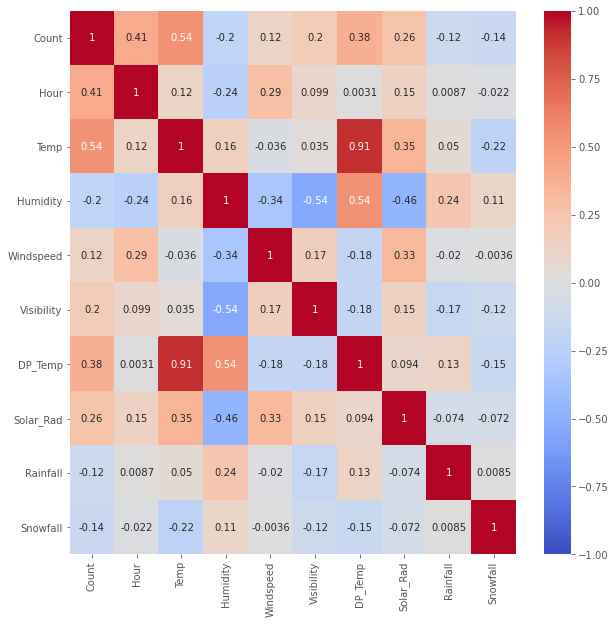

In [20]:
# Heatmap to understand the correlations between the variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmax=1, vmin=-1,
            cmap='coolwarm',
            annot=True)

In [21]:
# Drop columns that are found to be irrelevant in further understanding
df = df.drop(['DP_Temp'], axis=1)
df = df.drop(['Func_Day'], axis=1)

In [22]:
# Save the prepared data to CSV
# df.to_csv('C:/Users/sbak0/Downloads/data_prepared.csv')

In [23]:
# New dataset 
google_sheet_url = 'https://docs.google.com/spreadsheets/d/19r2fuwp4ypn0X2-7sQzTlKXr7lcnRuMlvyzc7vjUE_c/edit#gid=187305695'
url = google_sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_prepared = pd.read_csv(url)